In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style("darkgrid")

In [5]:
df=pd.read_csv("/content/drive/MyDrive/starbucks.csv",index_col=0)

In [6]:
print(df.head())

                          item  calories   fat  carb  fiber  protein    type
1                 8-Grain Roll       350   8.0    67      5       10  bakery
2            Apple Bran Muffin       350   9.0    64      7        6  bakery
3                Apple Fritter       420  20.0    59      0        5  bakery
4              Banana Nut Loaf       490  19.0    75      4        7  bakery
5  Birthday Cake Mini Doughnut       130   6.0    17      0        0  bakery


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 1 to 77
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item      77 non-null     object 
 1   calories  77 non-null     int64  
 2   fat       77 non-null     float64
 3   carb      77 non-null     int64  
 4   fiber     77 non-null     int64  
 5   protein   77 non-null     int64  
 6   type      77 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.8+ KB


In [9]:
df.describe()

,calories,fat,carb,fiber,protein
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,338.831169,13.766234,44.870130,2.220779,9.480519
std,105.368701,7.095488,16.551634,2.112764,8.079556
min,80.000000,0.000000,16.000000,0.000000,0.000000
25%,300.000000,9.000000,31.000000,0.000000,5.000000
50%,350.000000,13.000000,45.000000,2.000000,7.000000
75%,420.000000,18.000000,59.000000,4.000000,15.000000
max,500.000000,28.000000,80.000000,7.000000,34.000000


In [10]:
df["item"].nunique()

77

In [11]:
df["item"].unique()

array(['8-Grain Roll', 'Apple Bran Muffin', 'Apple Fritter',
       'Banana Nut Loaf', 'Birthday Cake Mini Doughnut',
       'Blueberry Oat Bar', 'Blueberry Scone',
       'Bountiful Blueberry Muffin', 'Butter Croissant ', 'Cheese Danish',
       'Chocolate Chunk Cookie', 'Chocolate Cinnamon Bread',
       'Chocolate Croissant', 'Chocolate Old-Fashioned Doughnut',
       'Chonga Bagel', 'Cinnamon Chip Scone', 'Cranberry Orange Scone',
       'Double Chocolate Brownie', 'Double Fudge Mini Doughnut',
       'Everything with Cheese Bagel', 'Ginger Molasses Cookie',
       'Iced Lemon Pound Cake', 'Mallorca Sweet Bread',
       'Maple Oat Pecan Scone ', 'Marble Pound Cake',
       'Marshmallow Dream Bar', 'Morning Bun', 'Multigrain Bagel',
       'Old-Fashioned Glazed Doughnut', 'Outrageous Oatmeal Cookie',
       'Petite Vanilla Bean Scone', 'Plain Bagel', 'Pumpkin Bread',
       'Pumpkin Scone ', 'Raspberry Scone', 'Raspberry Swirl Pound Cake',
       'Reduced-Fat Banana Chocolate Chip C

In [13]:
df["type"].unique()

array(['bakery', 'bistro box', 'petite', 'hot breakfast', 'salad',
       'sandwich', 'parfait'], dtype=object)

In [15]:
df.groupby("type")["item"].count()

,item
type,
bakery,41
bistro box,8
hot breakfast,8
parfait,3
petite,9
salad,1
sandwich,7


<function matplotlib.pyplot.show(close=None, block=None)>

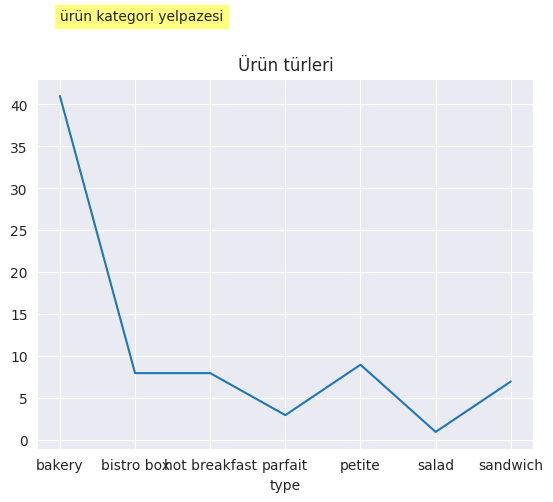

In [16]:
df.groupby("type")["item"].count().plot()
plt.title("Ürün türleri")
plt.text(0.,50,"ürün kategori yelpazesi",bbox=dict(facecolor="yellow",alpha=0.5))
plt.show

<ipython-input-18-4b1f8b503632>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type",data=df,palette="Set1")


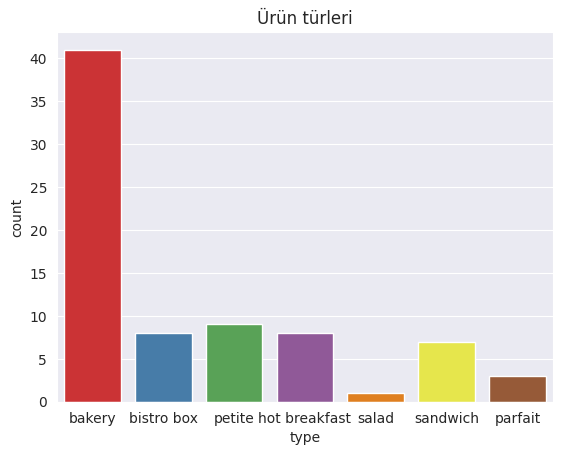

In [18]:
sns.countplot(x="type",data=df,palette="Set1")
plt.title("Ürün türleri")
plt.show()

<ipython-input-21-ea460edd39e3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind="bar",x="type",y="calories",data=df,palette="Set1")


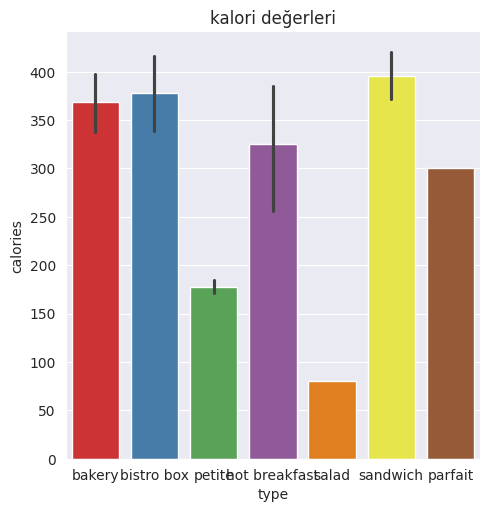

In [21]:
sns.catplot(kind="bar",x="type",y="calories",data=df,palette="Set1")
plt.title("kalori değerleri")
plt.show()

<ipython-input-22-656fa212ddbb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind="bar",x="type",y="protein",data=df,palette="Set1")


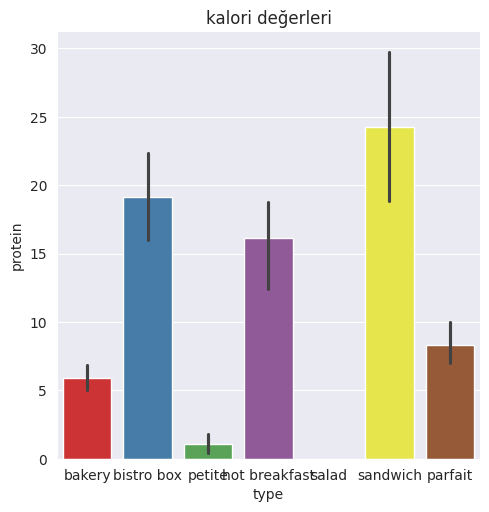

In [22]:
sns.catplot(kind="bar",x="type",y="protein",data=df,palette="Set1")
plt.title("kalori değerleri")
plt.show()

In [24]:
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

          calories       fat      carb     fiber   protein
calories  1.000000  0.758682  0.674999  0.260645  0.410398
fat       0.758682  1.000000  0.144547 -0.028549  0.223470
carb      0.674999  0.144547  1.000000  0.213044 -0.050789
fiber     0.260645 -0.028549  0.213044  1.000000  0.488564
protein   0.410398  0.223470 -0.050789  0.488564  1.000000


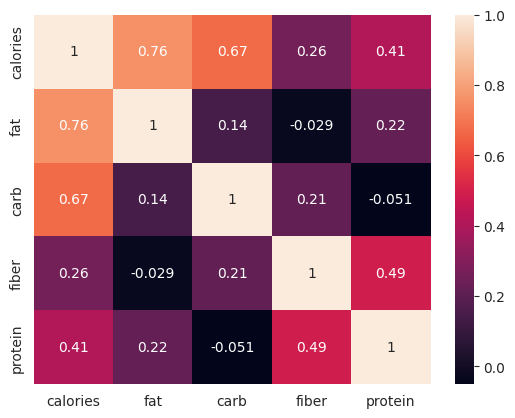

In [29]:
numerical_df = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_df].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

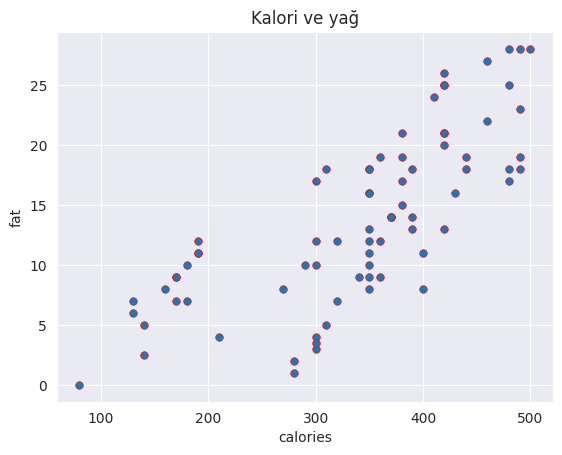

In [30]:
plt.title("Kalori ve yağ")
sns.scatterplot(x="calories",y="fat",data=df,s=30,edgecolor="red")
plt.show()